In [1]:
import torch 
import numpy as np
import time 
import torch.nn as  nn

In [2]:
torch.tensor([1,2,4])


tensor([1, 2, 4])

In [ ]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [4]:
torch.ones_like(torch.tensor([1,2,3,4 ,99,8]))

tensor([1, 1, 1, 1, 1, 1])

In [5]:
torch.empty(6, 6)

tensor([[ 1.2119e+25,  4.9658e+28,  2.6890e+32,  6.4577e+16,  3.4736e-12,
          3.9604e-11],
        [ 7.5640e+23,  1.5793e-19,  5.7704e-05,  2.5353e+30,  3.3351e-43,
          4.1773e-41],
        [ 6.5612e-39,  1.5488e+04,  2.5353e+30,  2.7465e-43,  2.1684e-41,
          2.6177e+30],
        [ 3.9376e-43,  1.0060e-40,  1.2255e-38,  8.0071e-22,  1.0141e+31,
          5.6052e-45],
        [ 3.5059e+00,  1.6661e-41,  1.0221e+19,  1.1625e+27,  1.6529e+19,
          1.8337e+31],
        [ 1.0312e-40,  2.6582e-40,  4.3429e-38, -4.0240e+34,  1.1844e-38,
         -2.8602e-29]])

In [6]:
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your
[0.55, 0.87, 0.66], # journey
[0.57, 0.85, 0.64], # starts
[0.22, 0.58, 0.33], # with
[0.77, 0.25, 0.10], # one
[0.05, 0.80, 0.55]] # step
)

In [7]:
inputs.dtype

torch.float32

In [8]:
start_time  = time.time()
attetion_score = torch.empty(6 ,6)
for i , x_i in enumerate(inputs):
    for j , x_j in enumerate(inputs):
        attetion_score[i,j] = torch.dot(x_i ,x_j)

print(attetion_score)
end_time = time.time()
print(f"Time taken for the code block: {end_time - start_time:.6f} seconds")

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
Time taken for the code block: 0.005800 seconds


In [9]:
start_time  = time.time()
ttetion_score = inputs @ inputs.T 
end_time = time.time()
print(attetion_score)
print(f"Time taken for the code block: {end_time - start_time:.6f} seconds")

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
Time taken for the code block: 0.005135 seconds


In [10]:
import torch.nn as nn

class SelfAttention_V1(nn.Module):
        def __init__(self,d_in , d_out):
                super().__init__()
                self.d_out = d_out
                self.w_query = nn.Parameter(torch.randn(d_in , d_out))
                self.w_key = nn.Parameter(torch.randn(d_in , d_out))
                self.w_value = nn.Parameter(torch.randn(d_in , d_out))
        def forward(self, x):
                keys = x @ self.w_key
                queries = x @ self.w_query
                values = x @ self.w_value
                atten_score = queries @ keys.T
                atten_weight  = torch.softmax(atten_score/keys.shape[-1]** 0.5 , dim =1)
                context_vector = atten_weight @ values
                return context_vector
        
        


In [11]:
torch.manual_seed(123)
sel_att  =SelfAttention_V1(3 , 2)
print(sel_att(inputs))


tensor([[0.2845, 0.4071],
        [0.2854, 0.4081],
        [0.2854, 0.4075],
        [0.2864, 0.3974],
        [0.2863, 0.3910],
        [0.2860, 0.4039]], grad_fn=<MmBackward0>)


In [12]:
# self-attention class using the Linear Layer 
class SelfAttention_v2(nn.Module):
                def __init__(self, d_in, d_out, qkv_bias  = False):
                        super().__init__()
                        self.d_out = d_out 
                        self.w_query = nn.Linear(d_in, d_out , bias=qkv_bias)
                        self.w_key = nn.Linear(d_in , d_out, bias=qkv_bias)
                        self.w_value = nn.Linear(d_in , d_out, bias=qkv_bias)
                        
                def forward(self, x):
                        keys = self.w_key(x)
                        queries = self.w_query(x)
                        values  =  self.w_value(x)
                        attetion_score = queries @ keys.T
                        atten_weight = torch.softmax(attetion_score / keys.shape[-1]**0.5 , dim =1)
                        contxt_vec = atten_weight @ values
                        return contxt_vec

In [13]:
torch.manual_seed(789)
d_in  =3 
d_out =2
sa_v2  = SelfAttention_v2(d_in , d_out)
print(sa_v2(inputs))


tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [14]:
query = sa_v2.w_query(inputs)
keys = sa_v2.w_key(inputs)
atten_score = query @ keys.T 
print(atten_score)
atten_weight  = torch.softmax(atten_score  / keys.shape[-1]**5 , dim= 1)
print(atten_weight)

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)
tensor([[0.1677, 0.1666, 0.1666, 0.1662, 0.1669, 0.1660],
        [0.1682, 0.1667, 0.1667, 0.1659, 0.1667, 0.1658],
        [0.1682, 0.1667, 0.1667, 0.1659, 0.1667, 0.1658],
        [0.1675, 0.1667, 0.1667, 0.1662, 0.1667, 0.1662],
        [0.1674, 0.1667, 0.1667, 0.1663, 0.1666, 0.1663],
        [0.1678, 0.1667, 0.1667, 0.1661, 0.1667, 0.1661]],
       grad_fn=<SoftmaxBackward0>)


In [15]:
atten_weight.shape[0]

6

In [16]:
torch.tril(torch.tensor([[24,35,46,6] ,[13,4,56,6]]))

tensor([[24,  0,  0,  0],
        [13,  4,  0,  0]])

In [17]:
context_length = atten_weight.shape[0]
mask_simple = torch.tril(torch.ones(context_length , context_length))
mask_simple

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])

In [18]:
masked_sample = atten_weight * mask_simple
masked_sample

tensor([[0.1677, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1682, 0.1667, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1682, 0.1667, 0.1667, 0.0000, 0.0000, 0.0000],
        [0.1675, 0.1667, 0.1667, 0.1662, 0.0000, 0.0000],
        [0.1674, 0.1667, 0.1667, 0.1663, 0.1666, 0.0000],
        [0.1678, 0.1667, 0.1667, 0.1661, 0.1667, 0.1661]],
       grad_fn=<MulBackward0>)

In [19]:
torch.tril(atten_weight , diagonal=0 )

tensor([[0.1677, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1682, 0.1667, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1682, 0.1667, 0.1667, 0.0000, 0.0000, 0.0000],
        [0.1675, 0.1667, 0.1667, 0.1662, 0.0000, 0.0000],
        [0.1674, 0.1667, 0.1667, 0.1663, 0.1666, 0.0000],
        [0.1678, 0.1667, 0.1667, 0.1661, 0.1667, 0.1661]],
       grad_fn=<TrilBackward0>)

In [20]:
masked_sample.sum(dim=1 , keepdim= True)

tensor([[0.1677],
        [0.3349],
        [0.5015],
        [0.6671],
        [0.8337],
        [1.0000]], grad_fn=<SumBackward1>)

In [21]:
row_sum  = masked_sample.sum(dim=1 , keepdim= True)


In [22]:
masked_sample_norm = masked_sample / row_sum
masked_sample_norm

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5023, 0.4977, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3353, 0.3323, 0.3323, 0.0000, 0.0000, 0.0000],
        [0.2511, 0.2498, 0.2499, 0.2492, 0.0000, 0.0000],
        [0.2008, 0.1999, 0.1999, 0.1995, 0.1999, 0.0000],
        [0.1678, 0.1667, 0.1667, 0.1661, 0.1667, 0.1661]],
       grad_fn=<DivBackward0>)

In [23]:
torch.triu(torch.tensor([[2,23,4,5 ] ,[2,33,45,6]]) , diagonal= 1)

tensor([[ 0, 23,  4,  5],
        [ 0,  0, 45,  6]])

In [24]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)

masked = atten_score.masked_fill(mask.bool(), -torch.inf)



masked 

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)

In [25]:
atten_score.masked_fill(mask.bool() ,2)

tensor([[0.2899, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [0.4656, 0.1723, 2.0000, 2.0000, 2.0000, 2.0000],
        [0.4594, 0.1703, 0.1731, 2.0000, 2.0000, 2.0000],
        [0.2642, 0.1024, 0.1036, 0.0186, 2.0000, 2.0000],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786, 2.0000],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)

In [26]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = atten_score.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [27]:
mask.bool()

tensor([[False,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True],
        [False, False, False, False,  True,  True],
        [False, False, False, False, False,  True],
        [False, False, False, False, False, False]])

In [28]:
torch.triu(torch.ones(context_length , context_length) , diagonal=1 )


tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [29]:
torch.triu(torch.ones(context_length , context_length) , diagonal=1 ).bool()

tensor([[False,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True],
        [False, False, False, False,  True,  True],
        [False, False, False, False, False,  True],
        [False, False, False, False, False, False]])

In [30]:
mask  = torch.triu(torch.ones(context_length , context_length) , diagonal=1 )
masked =atten_score.masked_fill(mask.bool() ,-torch.inf )
masked

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)

In [31]:
atten_weights = torch.softmax(masked / keys.shape[-1]**5 ,dim = 1)
atten_weights

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5023, 0.4977, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3353, 0.3323, 0.3323, 0.0000, 0.0000, 0.0000],
        [0.2511, 0.2498, 0.2499, 0.2492, 0.0000, 0.0000],
        [0.2008, 0.1999, 0.1999, 0.1995, 0.1999, 0.0000],
        [0.1678, 0.1667, 0.1667, 0.1661, 0.1667, 0.1661]],
       grad_fn=<SoftmaxBackward0>)

In [32]:
torch.manual_seed(123)
dropout  = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(example)
print(dropout(example))

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [33]:
torch.manual_seed(123)
print(torch.nn.Dropout(0.5)(atten_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9954, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6647, 0.0000, 0.0000, 0.0000],
        [0.5022, 0.4997, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4015, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


In [34]:
batch = torch.stack((inputs , inputs), dim=0 )
print(batch)
print(batch.size())

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])
torch.Size([2, 6, 3])


In [35]:


inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [36]:
inputs.T

tensor([[0.4300, 0.5500, 0.5700, 0.2200, 0.7700, 0.0500],
        [0.1500, 0.8700, 0.8500, 0.5800, 0.2500, 0.8000],
        [0.8900, 0.6600, 0.6400, 0.3300, 0.1000, 0.5500]])

In [37]:
class CausalAttention(nn.Module):
    def __init__(self, d_in , d_out , context_length , dropout ,    qkv_bias = False):
        super().__init__()
        self.w_query = nn.Linear(d_in , d_out, bias= qkv_bias)
        self.w_key = nn.Linear(d_in , d_out, bias =qkv_bias)
        self.w_value = nn.Linear(d_in , d_out , bias  = qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
        'mask',
        torch.triu(torch.ones(context_length, context_length),
        diagonal=1))
    def forward(self, x):
        b , num_tokens , d_in = x.shape
        keys  = self.w_key(x)
        queries = self.w_query(x)
        values  = self.w_value(x)
        atten_scores = queries @ keys.transpose(1, 2)
        atten_scores.masked_fill_( #D
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)        
        # print(atten_scores)
        atten_weights = torch.softmax(atten_scores  / keys.shape[-1]**0.5 , dim= 1)
        # print(atten_weights)
        atten_weights = self.dropout(atten_weights)
        context_vector = atten_weights @ values
        return context_vector




In [38]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key= nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) #A
        self.register_buffer(
        'mask',
        torch.triu(torch.ones(context_length, context_length),
        diagonal=1)
        ) #B
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.transpose(1, 2) #C
        attn_scores.masked_fill_( #D
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec 

In [39]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs)
print(context_vecs.shape)

context_vecs.shape: tensor([[[-0.0844,  0.0414],
         [-0.2264, -0.0039],
         [-0.4163, -0.0564],
         [-0.5014, -0.1011],
         [-0.7754, -0.1867],
         [-1.1632, -0.3303]],

        [[-0.0844,  0.0414],
         [-0.2264, -0.0039],
         [-0.4163, -0.0564],
         [-0.5014, -0.1011],
         [-0.7754, -0.1867],
         [-1.1632, -0.3303]]], grad_fn=<UnsafeViewBackward0>)
torch.Size([2, 6, 2])


In [40]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self ,d_in, d_out , context_length , dropout, num_heads , qkv_bias  = False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in=d_in , d_out=d_out , dropout=dropout,context_length=context_length,qkv_bias=qkv_bias)
              for _ in range(num_heads)])

    def forward(self,x):
        return torch.cat([head(x) for head in self.heads],dim =-1)

In [41]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.0844,  0.0414,  0.0766,  0.0171],
         [-0.2264, -0.0039,  0.2143,  0.1185],
         [-0.4163, -0.0564,  0.3878,  0.2453],
         [-0.5014, -0.1011,  0.4992,  0.3401],
         [-0.7754, -0.1867,  0.7387,  0.4868],
         [-1.1632, -0.3303,  1.1224,  0.8460]],

        [[-0.0844,  0.0414,  0.0766,  0.0171],
         [-0.2264, -0.0039,  0.2143,  0.1185],
         [-0.4163, -0.0564,  0.3878,  0.2453],
         [-0.5014, -0.1011,  0.4992,  0.3401],
         [-0.7754, -0.1867,  0.7387,  0.4868],
         [-1.1632, -0.3303,  1.1224,  0.8460]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


In [42]:

inputs.shape

torch.Size([6, 3])

In [43]:
# Exercise :Change the embedding vector dimention to 2 instand of 4
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 1#Change the out dimention into 1 
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-9.1476e-02,  3.4164e-02],
         [-2.6796e-01, -1.3427e-03],
         [-4.8421e-01, -4.8909e-02],
         [-6.4808e-01, -1.0625e-01],
         [-8.8380e-01, -1.7140e-01],
         [-1.4744e+00, -3.4327e-01]],

        [[-9.1476e-02,  3.4164e-02],
         [-2.6796e-01, -1.3427e-03],
         [-4.8421e-01, -4.8909e-02],
         [-6.4808e-01, -1.0625e-01],
         [-8.8380e-01, -1.7140e-01],
         [-1.4744e+00, -3.4327e-01]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [44]:
batch.shape[1]

6

In [45]:
batch.shape

torch.Size([2, 6, 3])

In [46]:
ln = nn.Linear(3,2)
ln(inputs).shape
ln(inputs).view(2, 6  )

tensor([[ 0.0722,  0.7488,  0.0954,  0.7472,  0.0808,  0.7351],
        [-0.0481,  0.4820, -0.2781,  0.3609,  0.1056,  0.6211]],
       grad_fn=<ViewBackward0>)

In [47]:
batch.shape

torch.Size([2, 6, 3])

In [48]:
torch.ones(2,3).view(3,2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [49]:
2%2 ==0

True

In [50]:
2 //2 

1

In [51]:
ln(inputs).view(3,4).transpose(-2,1)

tensor([[ 0.0722,  0.0808, -0.2781],
        [ 0.7488,  0.7351,  0.3609],
        [ 0.0954, -0.0481,  0.1056],
        [ 0.7472,  0.4820,  0.6211]], grad_fn=<TransposeBackward0>)

In [52]:
class MultiHeadAttention_V2(nn.Module):
    def __init__(self, d_in , d_out , context_length  , dropout ,num_heads,qkv_bias = False):
        super().__init__()
        assert d_out % num_heads  == 0,'d_out must be divisible by the num_heads'
        self.w_query = nn.Linear(d_in , d_out ,bias=qkv_bias)
        self.w_key = nn.Linear(d_in , d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in  , d_out,bias=qkv_bias)
        self.d_in =d_in
        self.d_out = d_out
        self.dropout = nn.Dropout(dropout)
        self.num_heads  = num_heads
        self.head_dim = d_out // num_heads
        self.out_proj  = nn.Linear(d_out , d_out)
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length , context_length),diagonal=1)
        )

    def forward(self,x):
        b, num_tokens , d_in = x.shape
        keys = self.w_key(x)
        queries  = self.w_query(x)
        values = self.w_value(x)
        queries = queries.view(b, num_tokens , self.num_heads , self.head_dim)
        values = values.view(b , num_tokens , self.num_heads , self.head_dim)
        keys = keys.view( b, num_tokens , self.num_heads , self.head_dim)
        queries = queries.transpose(1, 2)
        keys = keys.transpose(1,2)
        values = values.transpose(1,2)
        attn_scores = queries @ keys.transpose(2, 3)
        mask_bool= self.mask.bool()[:num_tokens , :num_tokens]
        attn_scores.masked_fill(mask_bool , -torch.inf)
        attn_weights = torch.softmax(attn_scores /self.head_dim**0.5   , dim=-1 )
        attn_weights = self.dropout(attn_weights)
        context_vector = (attn_weights  @ values).transpose(1, 2)
        context_vector = context_vector.contiguous().view(b , num_tokens , self.d_out)
        context_vector = self.out_proj(context_vector)
        return context_vector







In [53]:

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention_V2(
        d_in=cfg["emb_dim"],
        d_out=cfg["emb_dim"],
        context_length=cfg["context_length"],
        num_heads=cfg["n_heads"],
        dropout=cfg["drop_rate"],
        qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_resid = nn.Dropout(cfg["drop_rate"])
    def forward(self, x):
    #A
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_resid(x)
        x = x + shortcut # Add the original input back
        shortcut = x #B
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_resid(x)
        x = x + shortcut #C
        return x

In [54]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573], #A
[0.8993, 0.0390, 0.9268, 0.7388],
[0.7179, 0.7058, 0.9156, 0.4340]],
[[0.0772, 0.3565, 0.1479, 0.5331],
[0.4066, 0.2318, 0.4545, 0.9737],
[0.4606, 0.5159, 0.4220, 0.5786]]]])

In [55]:
a

tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
          [0.8993, 0.0390, 0.9268, 0.7388],
          [0.7179, 0.7058, 0.9156, 0.4340]],

         [[0.0772, 0.3565, 0.1479, 0.5331],
          [0.4066, 0.2318, 0.4545, 0.9737],
          [0.4606, 0.5159, 0.4220, 0.5786]]]])

In [56]:
a.shape

torch.Size([1, 2, 3, 4])

In [57]:
a.transpose(2,3).shape

torch.Size([1, 2, 4, 3])

In [58]:
a

tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
          [0.8993, 0.0390, 0.9268, 0.7388],
          [0.7179, 0.7058, 0.9156, 0.4340]],

         [[0.0772, 0.3565, 0.1479, 0.5331],
          [0.4066, 0.2318, 0.4545, 0.9737],
          [0.4606, 0.5159, 0.4220, 0.5786]]]])

In [59]:
a.transpose(2,3)

tensor([[[[0.2745, 0.8993, 0.7179],
          [0.6584, 0.0390, 0.7058],
          [0.2775, 0.9268, 0.9156],
          [0.8573, 0.7388, 0.4340]],

         [[0.0772, 0.4066, 0.4606],
          [0.3565, 0.2318, 0.5159],
          [0.1479, 0.4545, 0.4220],
          [0.5331, 0.9737, 0.5786]]]])

In [60]:
a.shape

torch.Size([1, 2, 3, 4])

In [61]:
a.transpose(2,3 ).shape

torch.Size([1, 2, 4, 3])

In [62]:
a @ a.transpose(2,3)

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])

In [63]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention_V2(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.2595, 0.4014],
         [0.2583, 0.4014],
         [0.2583, 0.4014],
         [0.2575, 0.4031],
         [0.2582, 0.4026],
         [0.2575, 0.4028]],

        [[0.2595, 0.4014],
         [0.2583, 0.4014],
         [0.2583, 0.4014],
         [0.2575, 0.4031],
         [0.2582, 0.4026],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [64]:
position_emb = nn.Embedding(21,3)
position_emb(torch.arange(1,2))


tensor([[-1.8061,  1.8960, -0.1750]], grad_fn=<EmbeddingBackward0>)

In [65]:
position_emb(torch.tensor([20]))

tensor([[-0.9948,  1.2176, -0.2282]], grad_fn=<EmbeddingBackward0>)

In [66]:
# DummyGPTModel 
class DummyGPTModel(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.token_emb = nn.Embedding(cfg['vocab_size'] , cfg['emb_dim'])
        self.position_emb = nn.Embedding(cfg['vocab_size'], cfg['emb_dim'])
        self.dropout = nn.Dropout(cfg['drop_rate'])
        self.trf_blocks = nn.Sequential(*[DummyTransformerBlock(cfg)  for _ in range(cfg['n_layers'])])
        
        self.final_norm = DummyLayerNorm(cfg['emb_dim'])
        self.out_head = nn.Linear(cfg['emb_dim'] , cfg['vocab_size'] , bias= False)

    def forward(self, in_idx):
        batch_size  , seq_len = in_idx.shape
        tok_emb = self.token_emb(in_idx)
        pos_emb = self.position_emb(torch.arange(seq_len))
        x = tok_emb + pos_emb
        x = self.dropout(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits
    
class DummyTransformerBlock(nn.Module):
    def __init__(self,cfg):
        super().__init__()

    def forward(self,x):
        return x 
    
class DummyLayerNorm(nn.Module):
    def __init__(self, normalize_shape  , eps =1e-5):
        super().__init__()
    
    def forward(self, x):
        return x 


        


In [67]:
GPT_CONFIG_124M = {
"vocab_size": 50257, # Vocabulary size
"context_length": 1024,
# Context length
"emb_dim": 768,
# Embedding dimension
"n_heads": 12,
# Number of attention heads
"n_layers": 12,
# Number of layers
"drop_rate": 0.1,
# Dropout rate
"qkv_bias": False
# Query-Key-Value bias
}

In [68]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [69]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.0098, -1.3371,  1.5360,  ...,  0.9138, -0.0446,  0.5080],
         [-0.1986, -2.0926, -1.2976,  ...,  0.4652, -0.6466,  1.8320],
         [ 1.6675, -1.6455, -1.4320,  ..., -0.6257,  1.3321,  0.0252],
         [ 0.7580,  1.3023, -0.3567,  ..., -0.4735, -0.6564,  0.3811]],

        [[-0.9175, -0.5156,  2.0081,  ...,  1.0170,  0.2842,  0.7774],
         [-0.1943, -0.2929, -1.4559,  ...,  1.0894, -0.9605,  1.9351],
         [ 1.4038, -1.0772, -0.7692,  ..., -0.5776, -0.6314,  0.2204],
         [ 0.8002,  1.0435,  0.4070,  ..., -0.1311, -0.5104,  0.7819]]],
       grad_fn=<UnsafeViewBackward0>)


In [70]:
torch.manual_seed(123)
batch_example = torch.randn(2,5)
print(batch_example)
layer = nn.Sequential(nn.Linear(5,6) , nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])
tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [71]:
out.shape[-2]

2

In [72]:
out.shape

torch.Size([2, 6])

In [73]:
mean = out.mean(dim=-1 , keepdim= True) # dim =0  Column , dim = 1 Row 
var = out.var(dim=-1 , keepdim= True)
print(mean)
print(var)

tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [74]:
out[0][1] - mean[1]

tensor([0.1299], grad_fn=<SubBackward0>)

In [75]:
for i in range(0, 2):
    for j in range(0, 6):
    
        print(out[i][j]-mean[i].item())

tensor(0.0935, grad_fn=<SubBackward0>)
tensor(0.2145, grad_fn=<SubBackward0>)
tensor(-0.1324, grad_fn=<SubBackward0>)
tensor(0.0892, grad_fn=<SubBackward0>)
tensor(-0.1324, grad_fn=<SubBackward0>)
tensor(-0.1324, grad_fn=<SubBackward0>)
tensor(-0.0038, grad_fn=<SubBackward0>)
tensor(0.0224, grad_fn=<SubBackward0>)
tensor(-0.2170, grad_fn=<SubBackward0>)
tensor(0.3028, grad_fn=<SubBackward0>)
tensor(0.1127, grad_fn=<SubBackward0>)
tensor(-0.2170, grad_fn=<SubBackward0>)


In [76]:
out - mean / torch.sqrt(var)

tensor([[-0.6459, -0.5249, -0.8719, -0.6503, -0.8719, -0.8719],
        [-0.8744, -0.8482, -1.0876, -0.5678, -0.7579, -1.0876]],
       grad_fn=<SubBackward0>)

In [77]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim= -1 , keepdim= True)
var = out_norm.var(dim =-1, keepdim = True)
print(mean)
print(var)

tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [78]:
# Turn Off the scientific notation 
torch.set_printoptions(sci_mode= False)
print(mean)
print(var)

tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [79]:
class LayerNorm(nn.Module):
    def __init__(self , emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale  = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    def forward(self , x):
        mean = x.mean(dim= -1, keepdim = True)
        var = x.var(dim =-1, keepdim = True)
        norm_x = (x - mean) / torch.sqrt(var +self.eps)
        return self.scale * norm_x + self.shift


In [80]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.8000],
        [0.8000]], grad_fn=<VarBackward0>)


In [81]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return 0.5 * x *(1+ torch.tanh(torch.sqrt(torch.tensor(2.0/ torch.pi)) * (x+0.044715 * torch.pow(x, 3))) )
      

In [82]:
import matplotlib.pyplot as plt 

In [83]:
torch.linspace(3,-3, 100)

tensor([ 3.0000,  2.9394,  2.8788,  2.8182,  2.7576,  2.6970,  2.6364,  2.5758,
         2.5152,  2.4545,  2.3939,  2.3333,  2.2727,  2.2121,  2.1515,  2.0909,
         2.0303,  1.9697,  1.9091,  1.8485,  1.7879,  1.7273,  1.6667,  1.6061,
         1.5455,  1.4848,  1.4242,  1.3636,  1.3030,  1.2424,  1.1818,  1.1212,
         1.0606,  1.0000,  0.9394,  0.8788,  0.8182,  0.7576,  0.6970,  0.6364,
         0.5758,  0.5152,  0.4545,  0.3939,  0.3333,  0.2727,  0.2121,  0.1515,
         0.0909,  0.0303, -0.0303, -0.0909, -0.1515, -0.2121, -0.2727, -0.3333,
        -0.3939, -0.4545, -0.5152, -0.5758, -0.6364, -0.6970, -0.7576, -0.8182,
        -0.8788, -0.9394, -1.0000, -1.0606, -1.1212, -1.1818, -1.2424, -1.3030,
        -1.3636, -1.4242, -1.4848, -1.5455, -1.6061, -1.6667, -1.7273, -1.7879,
        -1.8485, -1.9091, -1.9697, -2.0303, -2.0909, -2.1515, -2.2121, -2.2727,
        -2.3333, -2.3939, -2.4545, -2.5152, -2.5758, -2.6364, -2.6970, -2.7576,
        -2.8182, -2.8788, -2.9394, -3.00

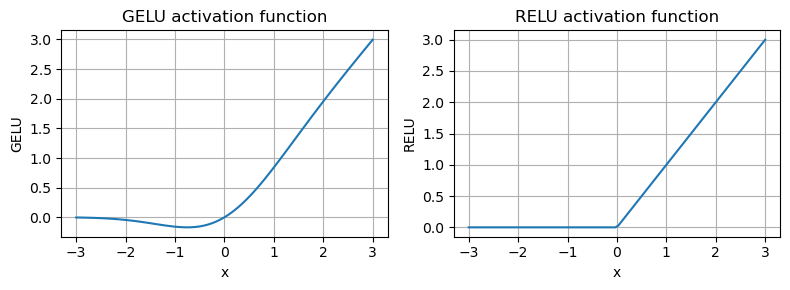

In [84]:
gelu , relu  = GELU() , nn.ReLU()
x = torch.linspace(-3,3, 100)
y_gelu , y_relu = gelu(x) , relu(x)
plt.figure(figsize=(8 , 3))
for i , (y  , label)  in enumerate(zip([y_gelu, y_relu] ,["GELU" , "RELU"]) , 1):
    plt.subplot(1,2 , i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f'{label}')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg['emb_dim'] , 4 * cfg['emb_dim']) ,
            GELU(),
            nn.Linear(4 * cfg['emb_dim'] , cfg['emb_dim'])
        )
    def forward(self, x ):
        return self.layers(x)
    

In [86]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.randn(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


In [87]:
# Shortcut connection or residual connection 

class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes , use_shortcut ):
        super().__init__()
        self.use_shorcut =  use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0] , layer_sizes[1]) , GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1] , layer_sizes[2]) , GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2] , layer_sizes[3]) , GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3] , layer_sizes[4]) , GELU()),
             nn.Sequential(nn.Linear(layer_sizes[4] , layer_sizes[5]) , GELU()),

        ])
    def forward(self , x ):
        for layer in self.layers:
            layer_output = layer(x)
            if self.use_shorcut and x.shape  ==  layer_output.shape:
                x = x + layer_output

            else:
                x = layer_output    

        return x 
    

In [88]:
layer_sizes = [3,3,3,3,3,1]
sample_input = torch.tensor([[1.,0., -1.]])
torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(layer_sizes=layer_sizes , use_shortcut= False)


In [89]:
def print_gradients(model , x):
    output = model(x)
    target  =  torch.tensor([[0]], dtype= torch.float32)
    loss = nn.MSELoss()
    loss = loss(output ,  target)
    loss.backward()
    for name , parm in model.named_parameters():
        if 'weight' in name:
            print(f"{name}  has gradient mean of {parm.grad.abs().mean().item()}")


In [90]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight  has gradient mean of 0.00020173587836325169
layers.1.0.weight  has gradient mean of 0.00012011159560643137
layers.2.0.weight  has gradient mean of 0.0007152040489017963
layers.3.0.weight  has gradient mean of 0.0013988736318424344
layers.4.0.weight  has gradient mean of 0.005049645435065031


In [91]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight  has gradient mean of 0.22169798612594604
layers.1.0.weight  has gradient mean of 0.20694111287593842
layers.2.0.weight  has gradient mean of 0.3289700150489807
layers.3.0.weight  has gradient mean of 0.26657330989837646
layers.4.0.weight  has gradient mean of 1.3258544206619263


In [92]:
# Transformer block 

class TransformerBlock(nn.Module):
        def __init__(self, cfg):
                super().__init__()
                self.attn = MultiHeadAttention_V2(d_in=cfg['emb_dim'] , d_out=cfg['emb_dim'] ,
                                                   context_length=cfg['context_length'] ,
                                                     dropout=cfg['drop_rate'] , num_heads=cfg['n_heads'] ,
                                                      qkv_bias=cfg['qkv_bias'] )
                self.layernorm1 = LayerNorm(emb_dim=cfg['emb_dim'])
                self.layernorm2 = LayerNorm(emb_dim=cfg['emb_dim'])
                self.ff = FeedForward(cfg=cfg)
                self.drop_out  =nn.Dropout(cfg['drop_rate'])

        def forward(self, x):
                shortcut = x
                x = self.layernorm1(x)
                x = self.attn(x)
                x = self.drop_out(x)
                x = shortcut + x

                shortcut = x 
                x = self.layernorm2(x)
                x = self.ff(x)
                x = self.drop_out(x)
                x = x + shortcut
                
                return x 

In [93]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, 'd_out must be divisible by num_heads'
        self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.d_in = d_in
        self.d_out = d_out
        self.dropout = nn.Dropout(dropout)
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.out_proj = nn.Linear(d_out, d_out)
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        # Linear projections
        queries = self.w_query(x).view(b, num_tokens, self.num_heads, self.head_dim)
        keys = self.w_key(x).view(b, num_tokens, self.num_heads, self.head_dim)
        values = self.w_value(x).view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose for multi-head attention
        queries = queries.transpose(1, 2)  # (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)        # (b, num_heads, num_tokens, head_dim)
        values = values.transpose(1, 2)    # (b, num_heads, num_tokens, head_dim)

        # Scaled dot-product attention
        attn_scores = queries @ keys.transpose(-2, -1)  # (b, num_heads, num_tokens, num_tokens)
        mask_bool = self.mask[:num_tokens, :num_tokens].unsqueeze(0).unsqueeze(0)
        mask_bool = mask_bool.expand(b, self.num_heads, num_tokens, num_tokens).bool()
        attn_scores = attn_scores.masked_fill(mask_bool, float('-inf'))

        # Attention weights
        attn_weights = torch.softmax(attn_scores / (self.head_dim ** 0.5), dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Context vector
        context_vector = (attn_weights @ values).transpose(1, 2)  # (b, num_tokens, num_heads, head_dim)
        context_vector = context_vector.contiguous().view(b, num_tokens, self.d_out)  # (b, num_tokens, d_out)

        # Output projection
        context_vector = self.out_proj(context_vector)
        return context_vector


In [94]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
        d_in=cfg["emb_dim"],
        d_out=cfg["emb_dim"],
        context_length=cfg["context_length"],
        num_heads=cfg["n_heads"],
        dropout=cfg["drop_rate"],
        qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_resid = nn.Dropout(cfg["drop_rate"])
    def forward(self, x):
    #A
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_resid(x)
        x = x + shortcut # Add the original input back
        shortcut = x #B
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_resid(x)
        x = x + shortcut #C
        return x

In [95]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768) #A
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)

In [96]:
print(output.shape)

torch.Size([2, 4, 768])


In [97]:
output

tensor([[[ 0.1649,  0.4003, -0.0746,  ...,  1.2644,  0.3327,  0.7242],
         [ 0.0295,  0.0499,  0.2529,  ...,  0.4699,  0.1284,  0.9746],
         [ 0.5534,  0.5785, -0.0309,  ...,  1.1541,  0.3949,  0.7598],
         [ 0.1631,  0.7129,  0.7272,  ...,  0.3312,  0.5731,  0.9255]],

        [[ 0.1788,  1.1680,  0.5809,  ...,  0.1828,  0.0076, -0.5598],
         [-0.2919,  0.6317,  0.2002,  ...,  0.3218,  0.4671, -0.0381],
         [ 0.9273,  0.4202,  0.3183,  ...,  0.3771,  0.7189, -0.1204],
         [ 0.6033,  0.5767,  0.3411,  ...,  1.3796,  1.2681,  0.3915]]],
       grad_fn=<AddBackward0>)

In [98]:
output

tensor([[[ 0.1649,  0.4003, -0.0746,  ...,  1.2644,  0.3327,  0.7242],
         [ 0.0295,  0.0499,  0.2529,  ...,  0.4699,  0.1284,  0.9746],
         [ 0.5534,  0.5785, -0.0309,  ...,  1.1541,  0.3949,  0.7598],
         [ 0.1631,  0.7129,  0.7272,  ...,  0.3312,  0.5731,  0.9255]],

        [[ 0.1788,  1.1680,  0.5809,  ...,  0.1828,  0.0076, -0.5598],
         [-0.2919,  0.6317,  0.2002,  ...,  0.3218,  0.4671, -0.0381],
         [ 0.9273,  0.4202,  0.3183,  ...,  0.3771,  0.7189, -0.1204],
         [ 0.6033,  0.5767,  0.3411,  ...,  1.3796,  1.2681,  0.3915]]],
       grad_fn=<AddBackward0>)

In [99]:
torch.arange(29)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [100]:
class GPTModel(nn.Module):
    def __init__(self, cfg):

        super().__init__()

        self.tok_emb = nn.Embedding(cfg['vocab_size'] , cfg['emb_dim'])

        self.pos_emb = nn.Embedding(cfg['context_length'] , cfg['emb_dim'])

        self.drop_rate = nn.Dropout(cfg['drop_rate'])

        self.transformer_block  = nn.Sequential(*[TransformerBlock(cfg) for _ in range(cfg['n_layers'])])

        self.final_norm  =  LayerNorm(emb_dim=cfg['emb_dim'])

        self.out_head = nn.Linear(cfg['emb_dim'] , cfg['vocab_size'] , bias = False)

    def forward(self, idx):

        batch_size , seq_len = idx.shape

        token_embs = self.tok_emb(idx)

        pos_embs = self.pos_emb(torch.arange(seq_len , device= idx.device))

        x = token_embs + pos_embs

        x  =  self.drop_rate(x)

        x = self.transformer_block(x)

        x = self.final_norm(x)

        x = self.out_head(x)

        return x 


In [101]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.1381,  0.0079, -0.1957,  ..., -0.0222, -0.1062,  0.1717],
         [ 0.3867, -0.8400, -0.6558,  ..., -0.5162,  0.2362, -0.3349],
         [ 0.6985, -0.1826, -0.1634,  ...,  0.1472, -0.6503, -0.0054],
         [-0.4288,  0.1670, -0.1262,  ...,  1.1571,  0.5297, -0.5542]],

        [[ 0.1095, -0.2890, -0.1463,  ..., -0.0557,  0.2907, -0.2818],
         [ 0.0884, -0.3545, -0.3524,  ...,  1.2921,  0.0050,  0.1902],
         [ 0.6092,  0.4702, -0.4093,  ...,  0.7682,  0.3781, -0.1968],
         [-0.0608, -0.0739,  0.4747,  ...,  1.2458, -0.3834,  0.0612]]],
       grad_fn=<UnsafeViewBackward0>)


In [102]:
total_parms  = sum( p.numel() for p in model.parameters())
print(f"Total Parameters in the GPT Model :{total_parms:,}")


Total Parameters in the GPT Model :163,009,536


In [103]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [104]:
total_size_bytes = total_parms * 4 #A
total_size_mb = total_size_bytes / (1024 * 1024) #B
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


In [105]:
def Generate_text(model  , idx , context_size ,max_new_tokens ):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
            print(logits.shape)
        logits  = logits[:, -1  , :]
        print(logits.shape)
        probs  = torch.softmax(logits  , dim=-1)
        print(probs)
        idx_next = torch.argmax(probs, dim=-1 , keepdim= True)
        print(idx_next)
        idx = torch.cat((idx, idx_next), dim=1)
    return idx 

In [106]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) #A
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [107]:
model.eval() #A
out = Generate_text(
model=model,
idx=encoded_tensor,
max_new_tokens=11,
context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

torch.Size([1, 4, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0001,     0.0000,
             0.0000]])
tensor([[27018]])
torch.Size([1, 5, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[24086]])
torch.Size([1, 6, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[47843]])
torch.Size([1, 7, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[30961]])
torch.Size([1, 8, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[42348]])
torch.Size([1, 9, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[7267]])
torch.Size(

In [108]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue logger Normandy Compton analogous bore


In [109]:
# Efficient Transformers (Sparse Attention):

#     Use transformers like Longformer, BigBird, or Reformer that process long sequences with sparse attention mechanisms.
#     These models focus on critical parts of the context instead of attending to all tokens.
#     Use Case: Applications with long text but limited compute resources.
#     Pros:
#         Handles very long contexts efficiently.
#     Cons:
#         Requires specialized transformer architectures.

In [110]:
def text_to_token_idx(text,  tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded = torch.tensor(encoded).unsqueeze(0)
    return encoded

In [111]:
def token_idx_to_text(tokens , tokenizer):
    flat  = tokens.squeeze(0)
    decode = tokenizer.decode(flat.tolist())
    return decode

In [112]:
encode  =  text_to_token_idx('hello' , tokenizer)
print(token_idx_to_text(encode, tokenizer))

hello


In [113]:
token_ids = Generate_text(model= model , idx=text_to_token_idx("Every effort moves yoy" , tokenizer),
                          max_new_tokens=10 ,
                          context_size=GPT_CONFIG_124M['context_length']
                          )

torch.Size([1, 5, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[24086]])
torch.Size([1, 6, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[47843]])
torch.Size([1, 7, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[30961]])
torch.Size([1, 8, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[42348]])
torch.Size([1, 9, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[7267]])
torch.Size([1, 10, 50257])
torch.Size([1, 50257])
tensor([[    0.0000,     0.0000,     0.0000,  ...,     0.0000,     0.0000,
             0.0000]])
tensor([[19682]])
torch.Size

In [114]:
print(token_idx_to_text(token_ids , tokenizer))

Every effort moves yoyiman Byeswickattribute argueternity Normandy Compton analogous bore


In [115]:
with open('combined_qa.txt' ,'r') as file:
    text_data = file.read()

In [116]:
text_data = text_data[:20000]

In [117]:
total_char = len(text_data[:30000])

In [118]:
total_char

20000

In [119]:
total_toke  =  len(tokenizer.encode(text_data))
print(total_toke)

4920


In [120]:
# Training dataset 
train_ratio = 0.90
split = int(train_ratio * len(text_data))
print(split)
train_data= text_data[:split]
val_data = text_data[split:]

18000


In [121]:
import torch
from torch.utils.data import Dataset , DataLoader 

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.tokenizer = tokenizer
        self.input_ids = []
        self.target_ids = []
        token_ids = tokenizer.encode(txt) #A
        for i in range(0, len(token_ids) - max_length, stride): #B
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    def __len__(self): #C
        return len(self.input_ids)
    def __getitem__(self, idx): #D
         return self.input_ids[idx], self.target_ids[idx]

In [122]:
def create_dataloader_v1(txt, batch_size=4,
    max_length=256, stride=128, shuffle=True, drop_last=True):
    tokenizer = tiktoken.get_encoding("gpt2") #A
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) #B
    dataloader = DataLoader(
    dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)
    return dataloader

In [123]:
len(train_data)

18000

In [124]:
train_dataloader = create_dataloader_v1(txt= train_data , batch_size= 2 , max_length=GPT_CONFIG_124M['context_length'] , shuffle =  True , drop_last=True , stride=GPT_CONFIG_124M['context_length'])
val_dataloader = create_dataloader_v1(txt= val_data , batch_size= 2 , max_length=GPT_CONFIG_124M['context_length'] , shuffle =  False , drop_last=False , stride=GPT_CONFIG_124M['context_length'])


In [125]:
test = next(iter(train_dataloader))[0][0].tolist()

In [126]:
tokenizer.decode(test)

' the image79 ? gray\nwhat is the rectangular shaped object on the night stand on the right side of the bed in the image79 ? laptop\nwhat is in the corner of the wall on the left side of the bookshelf in the image80 ? hockey_stick\nwhat color is the hat on the top right of the bookshelf in the image80 ? black, white\nwhat color is the bookshelf in front of wall in the image80 ? brown\nwhat is the red object on the dresser in the image82 ? deoderant\nhow many knobs are in the first row of the drawers in the image82 ? 5\nwhat color is the blanket on the mattress in the image82 ? brown\nwhat is on the top of the dresser close to the red deoderant in the image82 ? box\nhow many tables are in front of the bookshelf close to the ladder in the image84 ? 1\nwhat are the blue and white objects above the tables on the left side of the picture in the image84 ? umbrella\nwhat color are the bookshelves in this picture in the image84 ? brown\nhow many ladders are in this picture in the image87 ? 1\n

In [133]:
for x , y in train_dataloader:
    print(x.shape , y.shape)
    

torch.Size([2, 1024]) torch.Size([2, 1024])
torch.Size([2, 1024]) torch.Size([2, 1024])


In [128]:
for x , y in val_dataloader:
    print(x.shape , y.shape)

In [129]:
next(iter(train_dataloader))

[tensor([[ 319,  262, 1353,  ..., 9582, 1666,  287],
         [ 262, 1353,  286,  ...,  290, 2330, 2134]]),
 tensor([[ 262, 1353,  826,  ..., 1666,  287,  262],
         [1353,  286,  262,  ..., 2330, 2134,  319]])]

In [130]:
def cal_loss_batch(input_batch , target_batch, model , device):
    input_batch , target_batch = input_batch.to(device) , target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(   logits.flatten(0,1), target_batch.flatten())
    return loss



In [131]:
def calc_loss_loader(data_loader , model , device , num_batches = None):
    total_loss = 0
    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches  = min(num_batches , len(data_loader))
    for i , (inputs , target) in enumerate(data_loader):
        if i < num_batches:
            loss  =  cal_loss_batch(inputs , target , model , device)

            total_loss +=loss.item()

        else:
            break

        return total_loss  / num_batches
    

    

In [132]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #A
# model.to(device)
# train_loss = calc_loss_loader(train_dataloader, model, device) #B
# val_loss = calc_loss_loader(val_dataloader, model, device)
# print("Training loss:", train_loss)
# print("Validation loss:", val_loss)

In [134]:
import torch 
import torch.nn as nn
import torch.utils
import torch.utils.data
from typing import List , Tuple ,Dict
from tqdm.auto import tqdm

def train_step(model:nn.Module , loss_fn , optimizer:torch.optim.Optimizer ,
                data_loader:torch.utils.data.DataLoader ,
                  device:torch.device ) -> Tuple[float , float]:
    model.train()
    train_loss = 0 
    for batch , (inputs , target ) in enumerate(data_loader):
        inputs , targets  = inputs.to(device) , targets.to(device)
        logits =  model(inputs)
        loss = loss_fn(logits , targets) 
        train_loss +=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    return train_loss


def test_step(model:nn.Module,loss_fn  , data_loader:torch.utils.data.DataLoader ,
               device:torch.device)->Tuple[float , float]:
    test_loss = 0
    model.eval()
    with torch.inference_mode():
        for X , y in data_loader:
            X  , y = X.to(device) , y.to(device)
            predictions = model(X)
            loss = loss_fn(predictions , y )
            test_loss += loss.item()

    test_loss /= len(data_loader)
    return test_loss


def train_model(model:nn.Module ,train_dataloader:torch.utils.data.DataLoader ,
           test_dataloader:torch.utils.data.DataLoader , optimizer:torch.optim.Optimizer ,
            loss_fn:nn.Module  , device:torch.device = None , epochs:int = 1  ):
    results = {
        "train_loss":[],
        "test_loss":[]
    }

    for epoch in tqdm(range(epochs)):
        train_loss = train_step(model= model , 
                                loss_fn=loss_fn , 
                                optimizer= optimizer , data_loader=train_dataloader ,device=device)
        test_loss = test_step(model=model , loss_fn= loss_fn , data_loader= test_dataloader   ,device= device)
        print(
            f"Epoch:{epoch}|"
            f"train_loss:{train_loss}|"
            f"test_loss:{test_loss}|"

        )
        results['train_loss'].append(train_loss.item() if isinstance(train_loss , torch.Tensor)  else train_loss)
        results['test_loss'].append(test_loss.item() if isinstance(test_loss , torch.Tensor)  else test_loss)


    return results

In [ ]:
train_model(model= model , train_dataloader= train_dataloader , test_dataloader= val_dataloader ,optimizer=)